*Import necessary libraries*

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

First things first, lets import the data set and take a look at it.

# Import the dataset 

In [63]:
train_data = pd.read_csv('data/raw_data/train.txt', names=['text', 'emotion'], sep=';')
test_data = pd.read_csv('data/raw_data/test.txt', names=['text', 'emotion'], sep=';')

# Analyze the dataset

In [64]:
print("The dataset has {} rows and {} columns".format(*train_data.shape))

The dataset has 16000 rows and 2 columns


In [65]:
print("Column names: {}".format(train_data.columns.values))

Column names: ['text' 'emotion']


In [66]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [67]:
train_data.emotion.value_counts() / train_data.shape[0] *100

emotion
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: count, dtype: float64

In [75]:
def plot_emotion_distribution(data):
    col = 'emotion'
    fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
    explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])[:10]
    labels = list(data[col].dropna().unique())[:10]
    sizes = data[col].value_counts()[:10]
    ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
    ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
    sns.countplot(y =col, data = data, ax=ax1)
    ax1.set_title("Total emotion count")
    ax2.set_title("Percentage of emotion")
    plt.show()

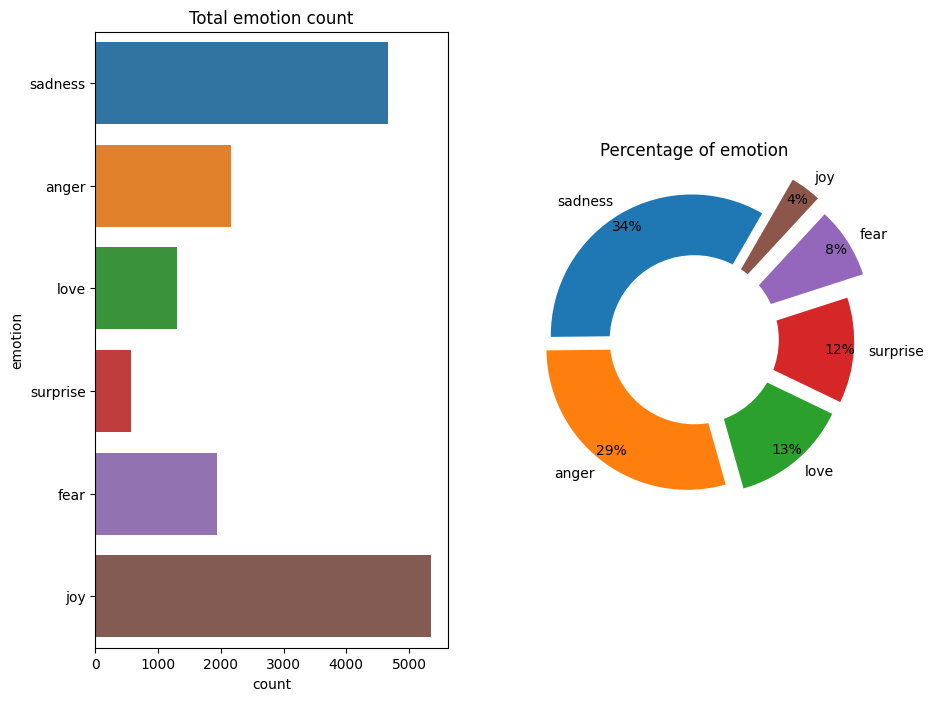

In [76]:
plot_emotion_distribution(train_data)

In [70]:
train_data.isnull().sum()

text       0
emotion    0
dtype: int64

In [71]:
train_data[train_data['text'].duplicated() == True]

,text,emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [72]:
index = train_data[train_data['text'].duplicated() == True].index
train_data.drop(index, axis = 0, inplace = True)
train_data.reset_index(inplace=True, drop = True)

In [73]:
train_data[train_data['text'].duplicated() == True]

,text,emotion


In [49]:
train_data['emotion'] = train_data['emotion'].apply(lambda x : x if x in ['happiness', 'sadness', 'worry', 'neutral', 'love'] else "other") 

For the test

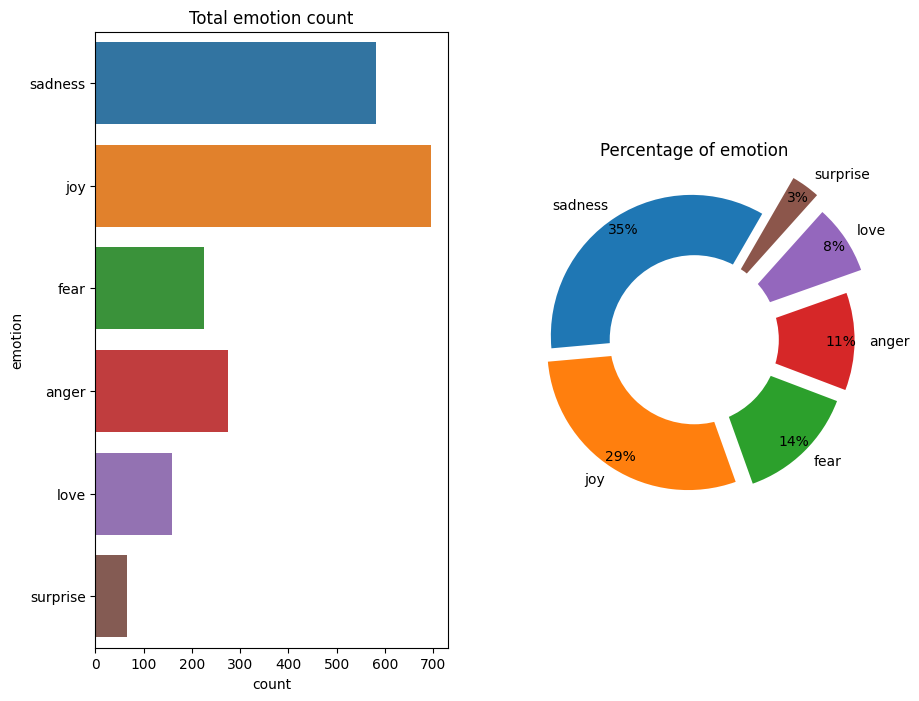

In [77]:
plot_emotion_distribution(test_data)

In [79]:
test_data.duplicated().sum()

0

There is no data leaking since the dataset is well created and so on

# Plot some graphs

In [80]:
def plot_charater_length_distribution(data):
    data['char_length'] = data['text'].apply(lambda x : len(x))
    fig, ax = plt.subplots(figsize=(16,8))
    for sentiment in data['emotion'].value_counts().sort_values()[-5:].index.tolist():
        #print(sentiment)
        sns.kdeplot(data[data['emotion']==sentiment]['char_length'],ax=ax, label=sentiment)
    ax.legend()
    ax.set_title("Distribution of character length emotion-wise [Top 5 emotions]")
    plt.show()

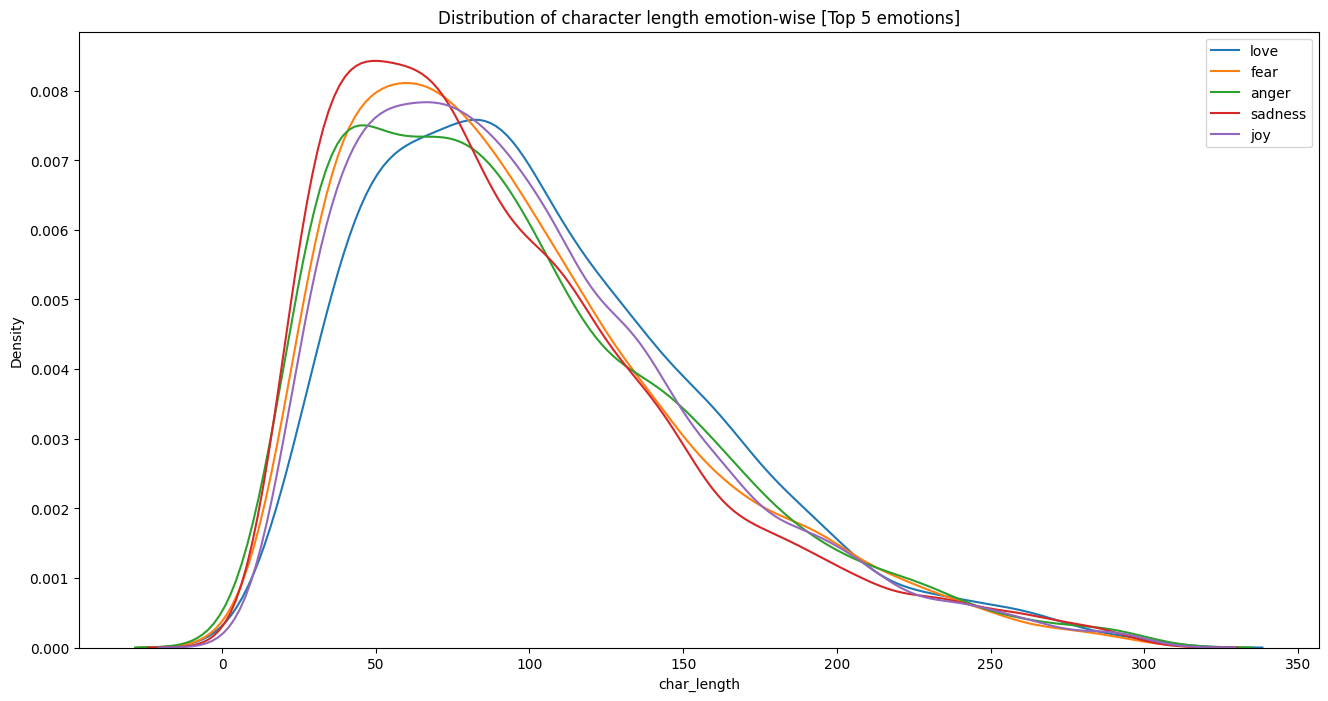

In [82]:
plot_charater_length_distribution(train_data)

In [86]:
def plot_wordcloud(data, emotioninput):
    emottext  = data[data['emotion'] == emotioninput].text
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(emottext))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

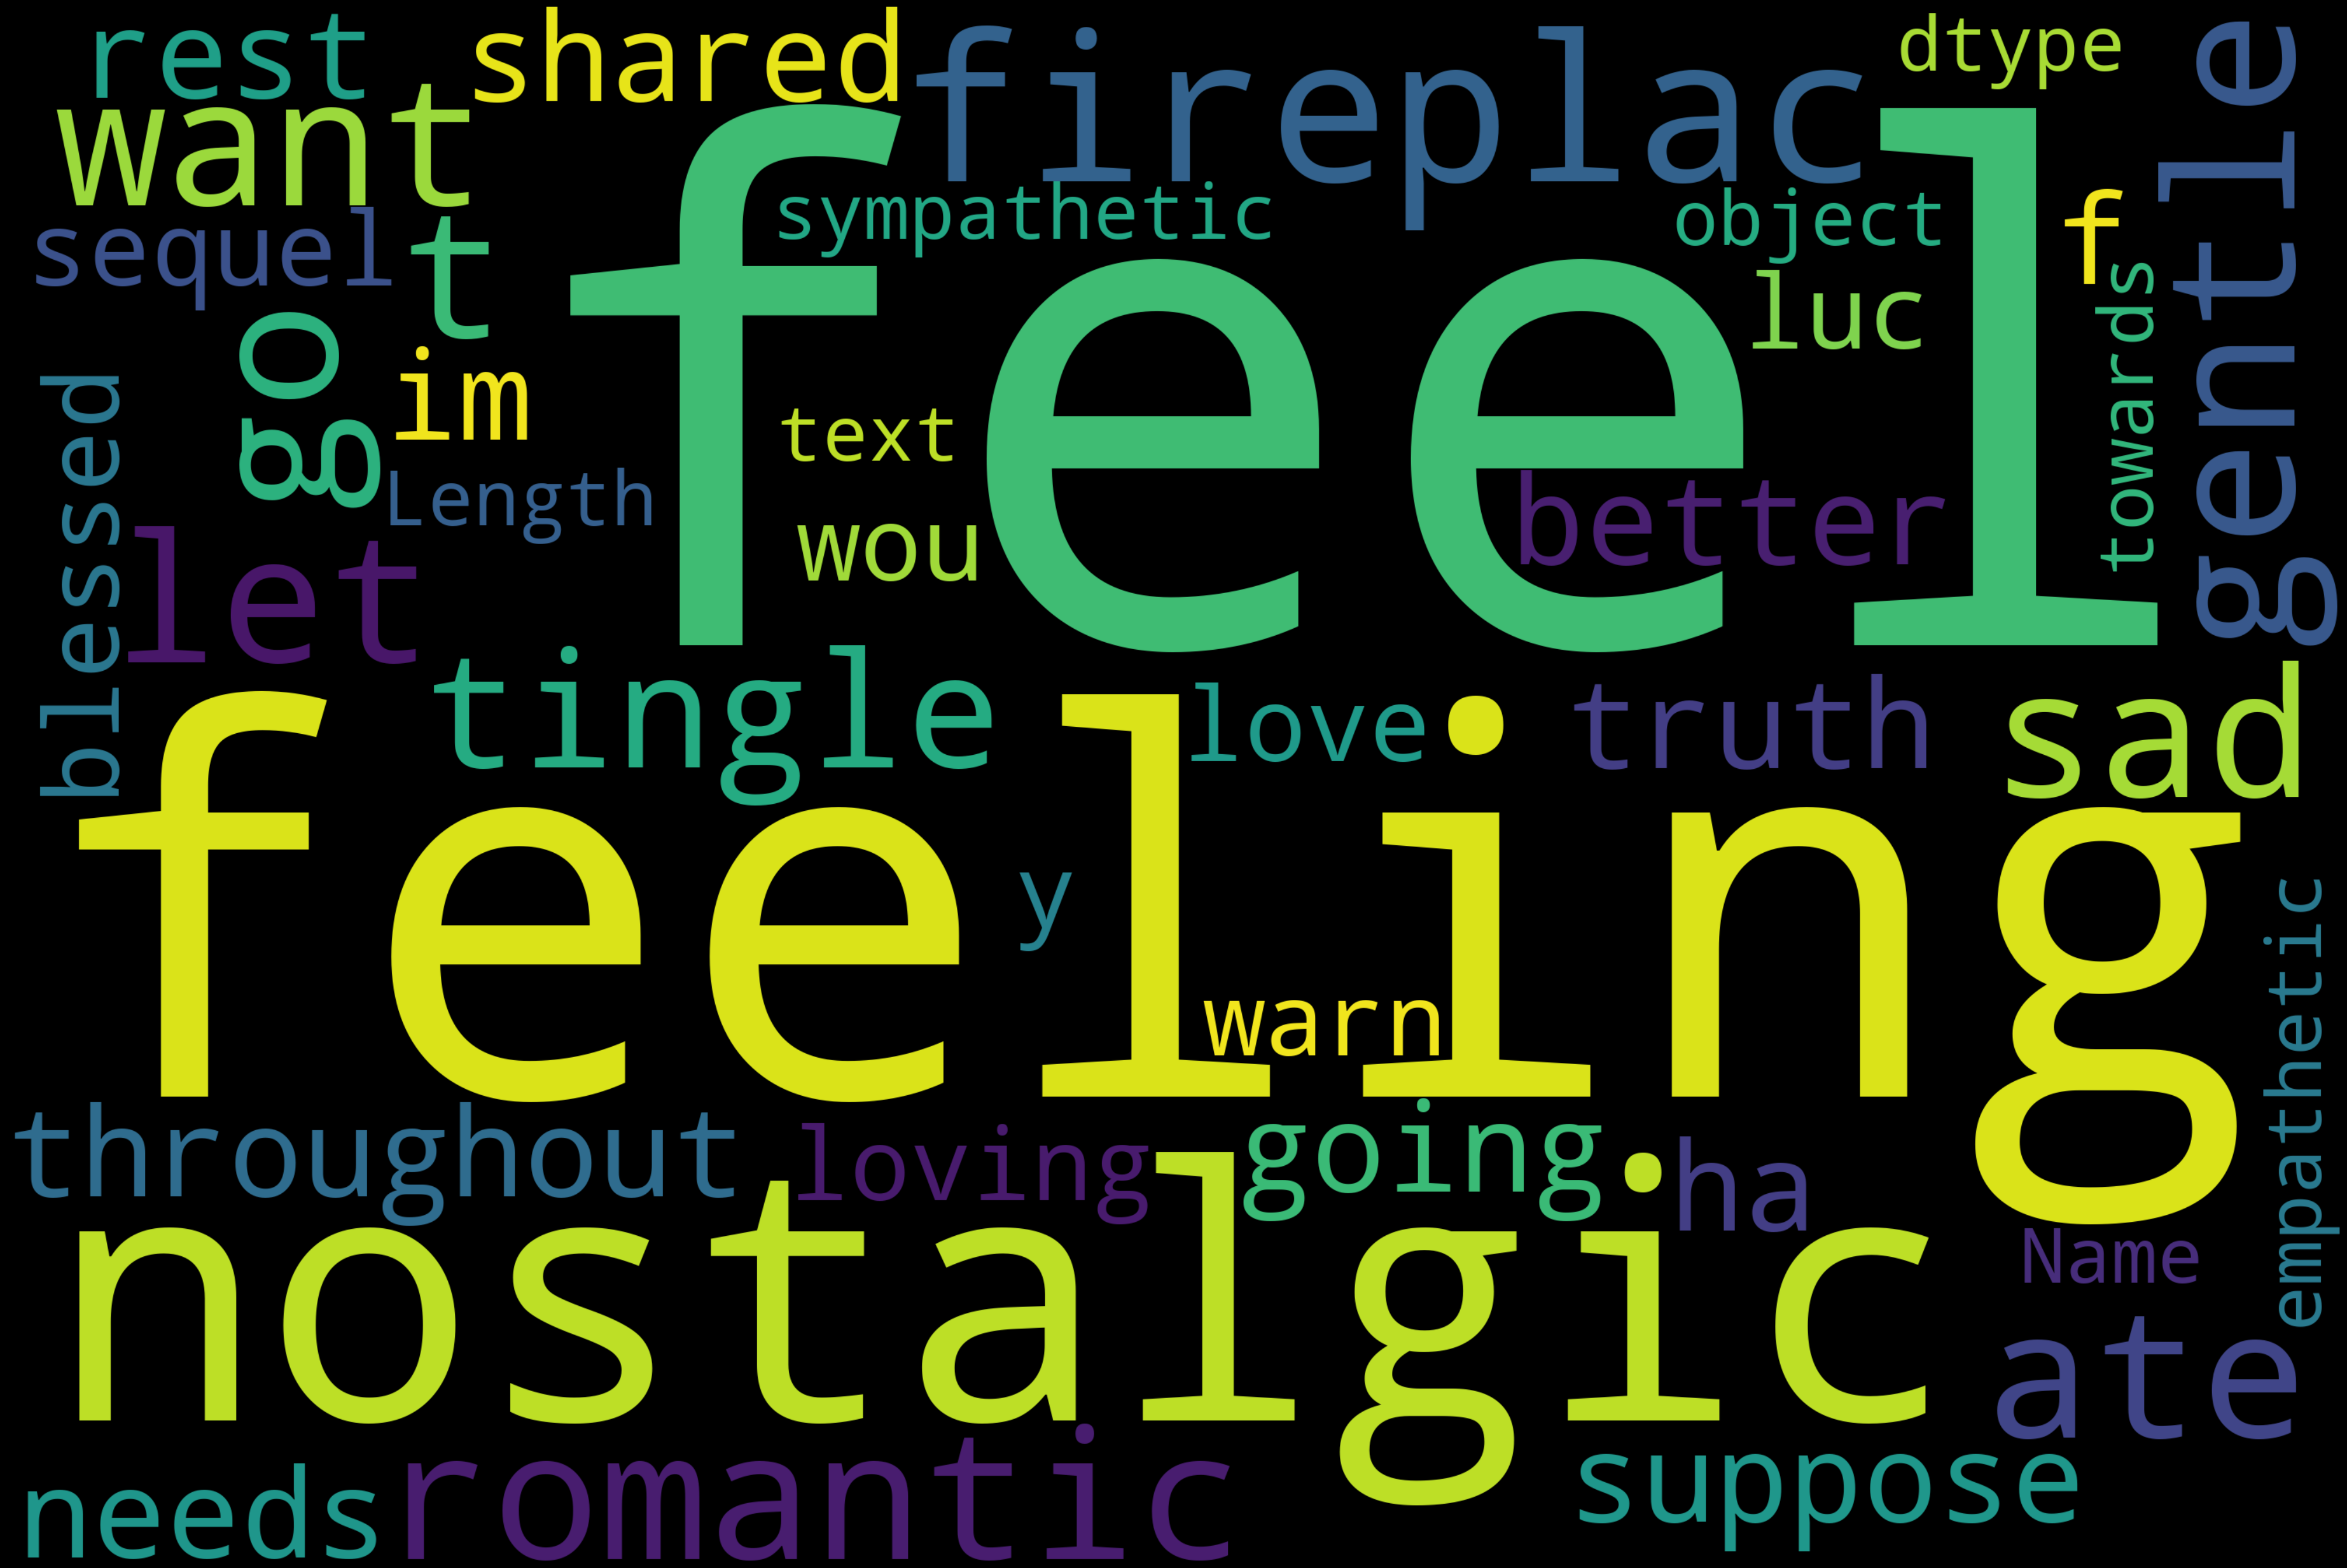

In [87]:
plot_wordcloud(train_data, 'love')